In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/explore-car-performance-fuel-efficiency-data/car_data.csv


In [2]:
cars= pd.read_csv('/kaggle/input/explore-car-performance-fuel-efficiency-data/car_data.csv')
cars.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014


In [3]:
print(cars.isnull().sum())
print(cars.shape)

city_mpg           0
class              0
combination_mpg    0
cylinders          2
displacement       2
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64
(550, 12)


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB


In [5]:
#instead of dropping missing values, replacing missing values with mean
# cars.fillna({
#     'cylinders': cars['cylinders'].mean(),
#     'displacement':cars['displacement'].mean(),
# },inplace=True) #changes in the same dataframe
cars=cars.dropna()
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         548 non-null    int64  
 1   class            548 non-null    object 
 2   combination_mpg  548 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            548 non-null    object 
 6   fuel_type        548 non-null    object 
 7   highway_mpg      548 non-null    int64  
 8   make             548 non-null    object 
 9   model            548 non-null    object 
 10  transmission     548 non-null    object 
 11  year             548 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 55.7+ KB


In [6]:
#one hot encoding of categorical features
categorical_categories= ['transmission','make','class','fuel_type','cylinders']
from sklearn.preprocessing import OrdinalEncoder

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform
cars[categorical_categories] = ordinal_encoder.fit_transform(cars[categorical_categories])

cars.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,2.0,29,1.0,2.5,fwd,1.0,36,19.0,6,1.0,2014
1,26,2.0,30,1.0,2.5,fwd,1.0,37,19.0,6,0.0,2014
2,25,7.0,27,1.0,2.5,fwd,1.0,31,19.0,cx-5 2wd,0.0,2014
3,26,7.0,29,1.0,2.0,fwd,1.0,34,19.0,cx-5 2wd,1.0,2014
4,26,7.0,28,1.0,2.0,fwd,1.0,32,19.0,cx-5 2wd,0.0,2014


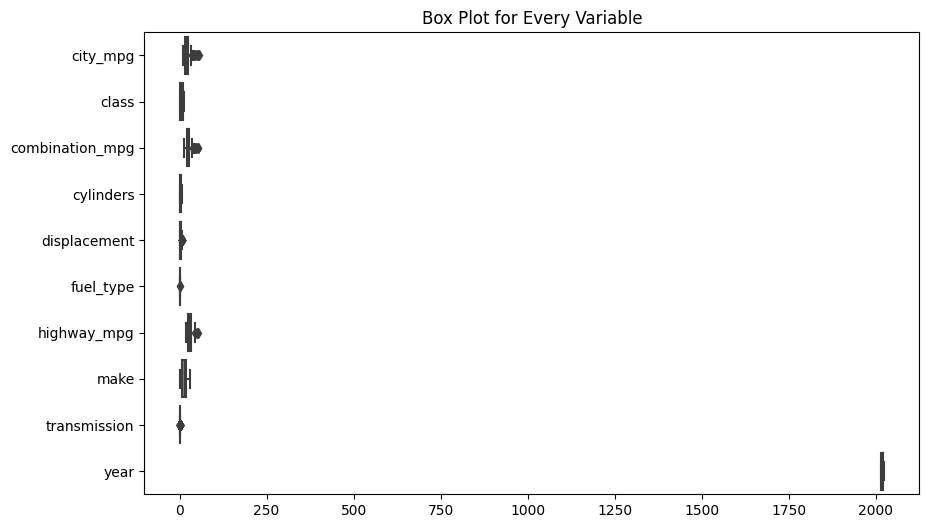

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cars, orient="h")
plt.title("Box Plot for Every Variable")
plt.show()
###no outliers

In [8]:
f_drop=['combination_mpg','drive','model','fuel_type']
features= cars.drop(columns=f_drop,axis=1)
target= cars['combination_mpg']


from sklearn.feature_selection import SelectKBest, f_classif

k_best= SelectKBest(score_func=f_classif, k=7)

X= k_best.fit_transform(features, target)
y= target

#indices of the selected features
selected_features_indices = k_best.get_support(indices=True)

#scores associated with each feature
feature_scores = k_best.scores_

#list of tuples containing feature names and scores
feature_info = list(zip(features.columns, feature_scores))

# Sort features based on scores
sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)

for feature_name, feature_score in sorted_feature_info[:10]:
    print(f"{feature_name}: {feature_score:.2f}")


city_mpg: 1244.63
highway_mpg: 338.09
displacement: 75.96
cylinders: 55.62
class: 6.13
make: 4.04
transmission: 3.23
year: 2.33


In [9]:
f_drop2= ['year','transmission','make','class']
features= features.drop(f_drop2,axis=1)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()), 
    ('linear_reg', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=69)


param_grid = {
    'poly_features__degree': [2, 3, 4, 5]  #polynomial degrees
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")

Best Parameters: {'poly_features__degree': 2}
Best Cross-Validation Score: 1.00


In [10]:
# best_model = grid_search.best_estimator_
best_model= LinearRegression()
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 0.15
R^2 Score: 0.99
